In [292]:
from pandas import read_csv
import numpy as np 
import pandas as pd
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



In [293]:
df=pd.read_csv('Zoo.csv')

In [294]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [295]:
features=list(df.columns)
print(features)

['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [296]:
features.remove('animal name')
features.remove('type')
print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [297]:
x=df[features].values.astype(np.float32)
y=df.type
print(x.shape)
print(y.shape)

(101, 16)
(101,)


In [298]:
num_folds=12
kfold=KFold(n_splits=14)

In [299]:
model = KNeighborsClassifier(n_neighbors=18)
results = cross_val_score(model, x, y, cv=kfold)

In [300]:
print(results.mean())

0.7602040816326531


In [291]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score,train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(51, 15)
(51,)
(51, 15)
(51,)


In [301]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [306]:
filename='Zoo.csv'
names=['hair','feathers','eggs',
       'milk','airborne','aquatic','predator','toothed','backbone','breathes',
       'venomous','fins','legs','tail','domestic','catsize','type']

dataframe = read_csv(filename, names=names)
array = dataframe.values
X = df[features].values.astype(np.float32)
Y = df.type

#X = array[:, 0:16]
#Y = array[:, 16]


In [307]:
n_neighbors = numpy.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [308]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [309]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZomAdmin\anaconda3\

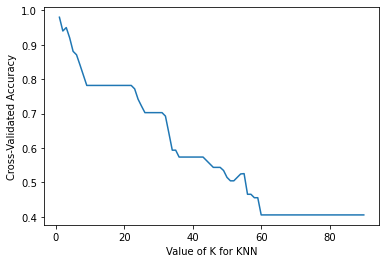

In [312]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 100)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()